In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
tea = pd.read_csv("/content/FAOSTAT_data_en_5-22-2025.csv")

In [ ]:
tea.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,404,Kenya,5510,Production,24310.01,"Beer of barley, malted",2021,2021,t,430000.0,X,Figure from international organizations,Unofficial figure
1,QCL,Crops and livestock products,404,Kenya,5510,Production,24310.01,"Beer of barley, malted",2022,2022,t,435000.0,X,Figure from international organizations,Unofficial figure
2,QCL,Crops and livestock products,404,Kenya,5510,Production,2166,Coconut oil,2021,2021,t,6000.0,A,Official figure,NaN
3,QCL,Crops and livestock products,404,Kenya,5510,Production,2166,Coconut oil,2022,2022,t,6000.0,A,Official figure,NaN
4,QCL,Crops and livestock products,404,Kenya,5510,Production,01921.02,"Cotton lint, ginned",2021,2021,t,559.0,A,Official figure,NaN


In [ ]:
tea.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [ ]:
tea.shape

(24, 15)

In [ ]:
tea.isnull().sum()

,0
Domain Code,0
Domain,0
Area Code (M49),0
Area,0
Element Code,0
Element,0
Item Code (CPC),0
Item,0
Year Code,0
Year,0


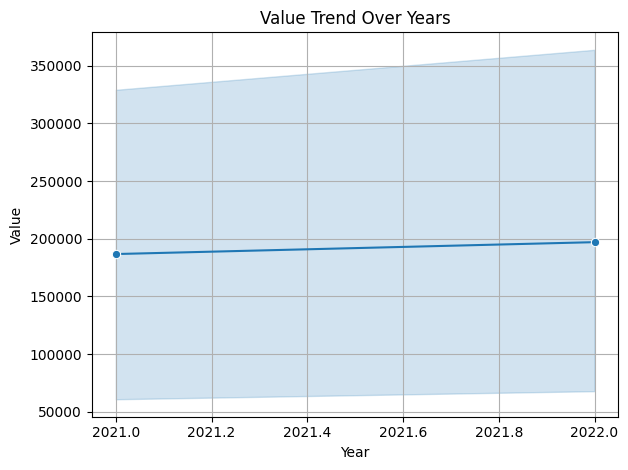

In [ ]:
sns.lineplot(data=tea, x="Year", y="Value", marker="o")
plt.title("Value Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

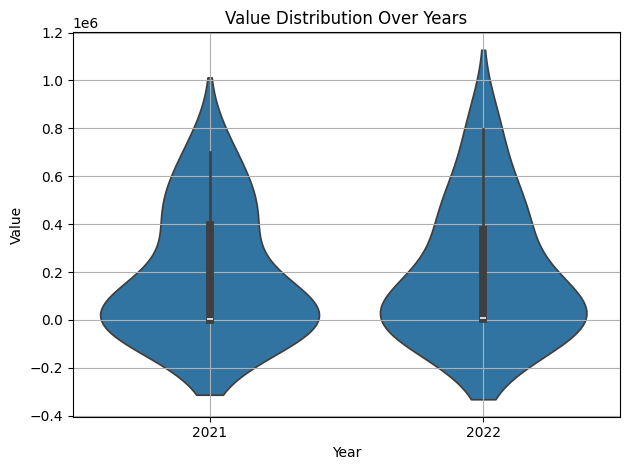

In [ ]:
sns.violinplot(data=tea, x="Year", y="Value")
plt.title("Value Distribution Over Years")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

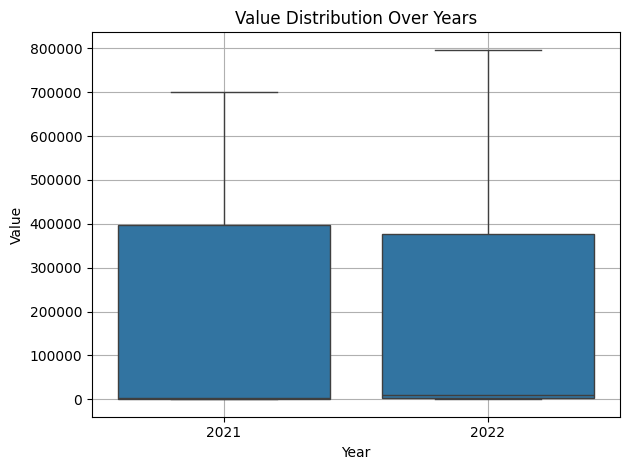

In [ ]:
sns.boxplot(data=tea, x="Year", y="Value")
plt.title("Value Distribution Over Years")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
tea = tea.drop(columns=["Note"])


In [ ]:
tea.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,404,Kenya,5510,Production,24310.01,"Beer of barley, malted",2021,2021,t,430000.0,X,Figure from international organizations
1,QCL,Crops and livestock products,404,Kenya,5510,Production,24310.01,"Beer of barley, malted",2022,2022,t,435000.0,X,Figure from international organizations
2,QCL,Crops and livestock products,404,Kenya,5510,Production,2166,Coconut oil,2021,2021,t,6000.0,A,Official figure
3,QCL,Crops and livestock products,404,Kenya,5510,Production,2166,Coconut oil,2022,2022,t,6000.0,A,Official figure
4,QCL,Crops and livestock products,404,Kenya,5510,Production,01921.02,"Cotton lint, ginned",2021,2021,t,559.0,A,Official figure


In [ ]:
df_grouped = tea.groupby('Year')['Value'].mean().reset_index()

In [ ]:
X = df_grouped[['Year']]
y = df_grouped['Value']

In [ ]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [ ]:
future_year = pd.DataFrame({'Year': [2025]})
predicted_value = model.predict(future_year)

print(f"Predicted value of tea in 2025: {predicted_value[0]:.2f}")



Predicted value of tea in 2025: 227962.30


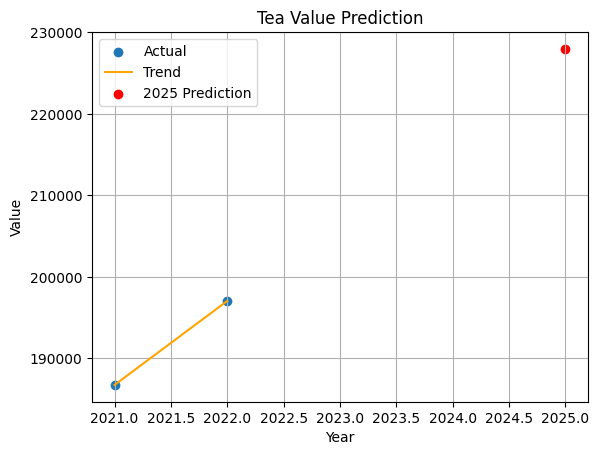

In [ ]:
plt.scatter(X, y, label='Actual')
plt.plot(X, model.predict(X), color='orange', label='Trend')
plt.scatter(2025, predicted_value, color='red', label='2025 Prediction')
plt.title("Tea Value Prediction")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>